##### PCA 手写实现

In [1]:
import numpy as np

In [7]:
class CPCA(object):
    def __init__(self, X, K):
        self.X = X  #样本举证
        self.K = K  #降维后的维度数
        self.centrX = [] #矩阵中心化之后
        self.C = [] #样本的协方差矩阵
        self.U = [] #降维转换矩阵
        self.Z = [] #降维后的数据
        
        self.centrX = self.center(self.X)
        self.C = self.cov(self.centrX)
        self.U = self._U()
        self.Z = self._Z()
    
    def center(self, X):
        print('原样本矩阵：\n',self.X)
        meanX = np.mean(X, axis=0)
        print("样本矩阵中心化：\n", meanX)
        centrx = X-meanX
        print("样本矩阵中心化之后：\n", centrx)
        return centrx
    
    def cov(self, X):
        n = X.shape[0]
        C = np.dot(X.T,X)/(n-1)
        print("样本的协方差矩阵：\n", C)
        return C
    
    def _U(self):
        a,b = np.linalg.eig(self.C) #求解协方差矩阵的特征值和特征向量
        print('样本集的协方差矩阵C的特征值:\n', a)
        print('样本集的协方差矩阵C的特征向量:\n', b)
        # 需要特征值降序排列
        ind = np.argsort(-1*a)
        print('样本集的协方差矩阵C的特征值降序的索引序列:\n', ind)
        UT = [b[:,ind[i]] for i in range(self.K)]
        print('样本集的协方差矩阵C的特征向量降序的矩阵:\n', UT)
        U = np.transpose(UT)
        
        print('%d阶降维转换矩阵U:\n'%self.K, U)
        return U
    def _Z(self):
        Z = np.dot(self.centrX, self.U)
        print('X shape:', np.shape(self.X))
        print('U shape:', np.shape(self.U))
        print('Z shape:', np.shape(Z))
        print('降维后的数据Z:\n', Z)
        return Z
        

In [8]:
X = np.array([[10, 15, 29],
                  [15, 46, 13],
                  [23, 21, 30],
                  [11, 9,  35],
                  [42, 45, 11],
                  [9,  48, 5],
                  [11, 21, 14],
                  [8,  5,  15],
                  [11, 12, 21],
                  [21, 20, 25]])
K = np.shape(X)[1] - 1
print('样本集(10行3列，10个样例，每个样例3个特征):\n', X)
pca = CPCA(X,K)

样本集(10行3列，10个样例，每个样例3个特征):
 [[10 15 29]
 [15 46 13]
 [23 21 30]
 [11  9 35]
 [42 45 11]
 [ 9 48  5]
 [11 21 14]
 [ 8  5 15]
 [11 12 21]
 [21 20 25]]
原样本矩阵：
 [[10 15 29]
 [15 46 13]
 [23 21 30]
 [11  9 35]
 [42 45 11]
 [ 9 48  5]
 [11 21 14]
 [ 8  5 15]
 [11 12 21]
 [21 20 25]]
样本矩阵中心化：
 [16.1 24.2 19.8]
样本矩阵中心化之后：
 [[ -6.1  -9.2   9.2]
 [ -1.1  21.8  -6.8]
 [  6.9  -3.2  10.2]
 [ -5.1 -15.2  15.2]
 [ 25.9  20.8  -8.8]
 [ -7.1  23.8 -14.8]
 [ -5.1  -3.2  -5.8]
 [ -8.1 -19.2  -4.8]
 [ -5.1 -12.2   1.2]
 [  4.9  -4.2   5.2]]
样本的协方差矩阵：
 [[ 108.32222222   74.53333333  -10.08888889]
 [  74.53333333  260.62222222 -106.4       ]
 [ -10.08888889 -106.4          94.17777778]]
样本集的协方差矩阵C的特征值:
 [335.15738485  95.32771231  32.63712506]
样本集的协方差矩阵C的特征向量:
 [[-0.30253213 -0.87499307 -0.37797014]
 [-0.86718533  0.08811216  0.49012839]
 [ 0.39555518 -0.47604975  0.78543792]]
样本集的协方差矩阵C的特征值降序的索引序列:
 [0 1 2]
样本集的协方差矩阵C的特征向量降序的矩阵:
 [array([-0.30253213, -0.86718533,  0.39555518]), array([-0.87499307,  0.0881

##### PCA 简化版

In [18]:
import numpy as np

def PCA(X,k):
    # 计算X的均值
    mean_X = np.mean(X,axis=0)
    X = X - mean_X
    # 计算协方差矩阵
    con_X = np.dot(X.T,X)/X.shape[0]
    # 计算特征值和特征向量
    a,b = np.linalg.eig(con_X)
    # 按照特征值大小排序
    idx = np.argsort(a)[::-1]
    # 计算降维矩阵
    U= b[:,idx[:k]]
    # 降维
    X_new = np.dot(X,U)
    return X_new

X = np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]])  #导入数据，维度为4
newX=PCA(X,2)  #降维为2
print(newX)

[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


##### PCA SKlearn

In [16]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]]) 
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.fit_transform(X)
print(newX)

[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


#### PCA 鸢尾花

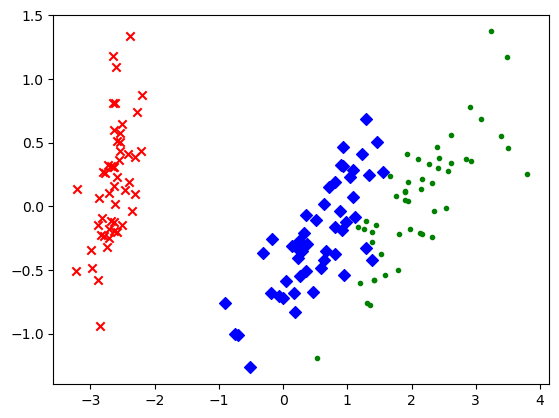

In [17]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets import load_iris

# 加载数据集
x,y=load_iris(return_X_y=True)
pca = dp.PCA(n_components=2)
new_X = pca.fit_transform(x)

red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
for i in range(len(new_X)):
    if y[i]==0:
        red_x.append(new_X[i][0])
        red_y.append(new_X[i][1])
    elif y[i]==1:
        blue_x.append(new_X[i][0])
        blue_y.append(new_X[i][1])
    else:
        green_x.append(new_X[i][0])
        green_y.append(new_X[i][1])
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()